# Introduction to Text generation

This notebook explains how we can split a given corpus of data into features and labels and then train a neural network to predict the next word in a sentence.

1. Create a corpus - break the text down to list of sentences.
2. Create a word_index(vocabulary) from the text.
3. Tokenize the data and create n-gram sequence for each sequence of the corpus.
4. Pad those sequences.
5. Segregate features from the sequences by reserving the last element of the array as labels.


In [1]:
##import the required libraries and APIs
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

print(tf.__version__)

2.17.0


## Step 1: Create a corpus

In [2]:
data = "India is the seventh-largest country by land area. \n It is the second-most populous country, with over 1.4 billion people. \n India is known for its rich cultural heritage and diversity. \n The country has 22 officially recognized languages. \n Hindi is the most widely spoken language in India. \n India gained independence from British rule in 1947. \n Mahatma Gandhi is considered the father of the nation. \n The Taj Mahal, located in Agra, is one of the Seven Wonders of the World. \n India has a parliamentary system of government. \n The capital city of India is New Delhi. \n The Indian economy is one of the fastest-growing in the world. \n India is a founding member of the United Nations. \n The country has a mixed economy with agriculture, manufacturing, and services sectors. \n The Indian film industry, known as Bollywood, is the largest in the world by the number of films produced. \n India is known for its IT industry and has a large pool of software engineers. \n The Indian Space Research Organisation (ISRO) is known for its cost-effective space missions. \n India's Mars Orbiter Mission was the first to reach Mars on its first attempt. \n The country has a diverse climate, ranging from the Himalayan cold to the tropical heat of the southern states. \n India is home to several major religions, including Hinduism, Buddhism, Jainism, and Sikhism. \n The Ganges River is considered sacred in Hinduism. \n India has a rich tradition of arts, including classical dance forms like Bharatanatyam and Kathak. \n Cricket is the most popular sport in India. \n The Indian Premier League (IPL) is one of the most-watched cricket leagues in the world. \n India has a long history of traditional medicine, including Ayurveda. \n The country is a major producer of spices, tea, and textiles. \n India is also known for its vibrant festivals like Diwali, Holi, and Eid. \n The Indian Constitution is the longest written constitution in the world. \n India has a secular state, allowing freedom of religion to its citizens. \n Yoga, which originated in India, is practiced worldwide. \n The country has a large diaspora, with Indians living in almost every part of the world. \n India has a young population, with a median age of around 28 years. \n The literacy rate in India has been steadily increasing. \n India has made significant progress in improving healthcare and reducing poverty. \n The country has a vast network of railways, one of the largest in the world. \n Indian cuisine is diverse, with regional variations and a wide range of flavors. \n India has a rich history, with ancient civilizations like the Indus Valley Civilization. \n The country was ruled by various dynasties, including the Mauryas, Guptas, and Mughals. \n India has a federal structure, with states having their own governments. \n The Indian judiciary is independent and plays a crucial role in upholding the Constitution. \n India has a vibrant democracy with regular elections at the national and state levels. \n The country has a mixed media landscape, with print, television, and digital platforms. \n India has a strong tradition of literature, with works in various languages. \n The Indian education system is one of the largest in the world. \n India has a growing startup ecosystem, with several unicorns in technology and e-commerce. \n The country has a large agricultural sector, with rice and wheat being the main crops. \n India is also a major producer of fruits, vegetables, and dairy products. \n The Indian economy has seen rapid growth in recent years, driven by reforms and investments. \n India has a rich biodiversity, with several national parks and wildlife sanctuaries. \n The Sundarbans in West Bengal is home to the Royal Bengal Tiger. \n The Himalayas, located in northern India, are the highest mountain range in the world. \n India has a tropical monsoon climate, with distinct wet and dry seasons. \n The country has a long coastline, with major ports like Mumbai, Chennai, and Kolkata. \n India has a complex and diverse social structure, with various castes and communities. \n The country has made strides in improving gender equality and women's rights. \n India has a vibrant civil society, with numerous non-governmental organizations working on various issues. \n The country has a large and active film industry, producing films in various languages. \n India is a major exporter of software services, textiles, and pharmaceuticals. \n The country has a rich musical tradition, with classical, folk, and contemporary genres. \n India has a growing tourism industry, attracting visitors with its historical sites and natural beauty. \n The country is also known for its traditional handicrafts and handlooms. \n India has a complex and diverse legal system, with a blend of traditional and modern laws. \n The country has a vibrant political landscape, with numerous parties and leaders. \n India has made significant progress in science and technology, with achievements in space, nuclear, and information technology. \n The country has a large and growing middle class, driving consumer demand. \n India has a rich history of philosophical thought, with schools like Vedanta, Buddhism, and Jainism. \n The country has a strong tradition of storytelling, with epics like the Ramayana and Mahabharata. \n India has a diverse and evolving fashion industry, blending traditional and modern styles. \n The country is known for its vibrant street markets and bazaars. \n India has a large and diverse workforce, with skills ranging from agriculture to high-tech industries. \n The country has a rich tradition of craftsmanship, with skilled artisans in various fields. \n India is also known for its traditional architecture, with temples, palaces, and forts. \n The country has a rich tradition of performing arts, with classical music, dance, and theater. \n India has a growing digital economy, with increasing internet penetration and e-commerce. \n The country is also making strides in renewable energy, with a focus on solar and wind power. \n India has a vibrant startup culture, with innovation in fields like fintech, edtech, and healthtech. \n The country has a long history of maritime trade, with connections to various parts of the world. \n India has a rich tradition of textile production, with famous fabrics like silk, cotton, and wool. \n The country has a diverse and evolving culinary scene, with regional specialties and fusion dishes. \n India has a long history of social reform, with leaders like Raja Ram Mohan Roy and Dr. B.R. Ambedkar. \n The country has a rich tradition of visual arts, including painting, sculpture, and pottery. \n India is known for its festivals and celebrations, with colorful and lively events throughout the year. \n The country has a growing automotive industry, with both domestic and international manufacturers. \n India has a rich tradition of folk art and craft, with regional variations and unique styles. \n The country has a long history of education, with ancient centers of learning like Nalanda and Takshashila. \n India has a vibrant literary scene, with authors writing in various languages and genres. \n The country has a growing digital media landscape, with increasing use of social media and online platforms. \n India has a rich tradition of spiritual practices, with yoga, meditation, and Ayurveda being widely practiced. \n The country has a long history of trade and commerce, with connections to various parts of the world. \n India has a rich tradition of hospitality, with a culture of welcoming guests and visitors. \n The country has a growing influence in global affairs, with an active role in international organizations. \n India has a large and diverse population, with various ethnic, linguistic, and cultural groups."

In [3]:
##instantiate tokenizer
tokenizer = Tokenizer()

##create corpus by lowering the letters and splitting the text by \n
corpus = data.lower().split("\n")
print(corpus)

['india is the seventh-largest country by land area. ', ' it is the second-most populous country, with over 1.4 billion people. ', ' india is known for its rich cultural heritage and diversity. ', ' the country has 22 officially recognized languages. ', ' hindi is the most widely spoken language in india. ', ' india gained independence from british rule in 1947. ', ' mahatma gandhi is considered the father of the nation. ', ' the taj mahal, located in agra, is one of the seven wonders of the world. ', ' india has a parliamentary system of government. ', ' the capital city of india is new delhi. ', ' the indian economy is one of the fastest-growing in the world. ', ' india is a founding member of the united nations. ', ' the country has a mixed economy with agriculture, manufacturing, and services sectors. ', ' the indian film industry, known as bollywood, is the largest in the world by the number of films produced. ', ' india is known for its it industry and has a large pool of softwar

## Step 2: Train the tokenizer and create word encoding dictionary

In [4]:
tokenizer.fit_on_texts(corpus)

##calculate vocabulary size - +1 for <oov> token
vocab_size = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(vocab_size)

{'the': 1, 'and': 2, 'a': 3, 'has': 4, 'india': 5, 'with': 6, 'of': 7, 'in': 8, 'is': 9, 'country': 10, 'rich': 11, 'its': 12, 'world': 13, 'tradition': 14, 'like': 15, 'various': 16, 'known': 17, 'indian': 18, 'for': 19, 'growing': 20, 'to': 21, 'diverse': 22, 'large': 23, 'history': 24, 'vibrant': 25, 'industry': 26, 'long': 27, 'one': 28, 'major': 29, 'including': 30, 'traditional': 31, 'also': 32, 'largest': 33, 'by': 34, 'most': 35, 'languages': 36, 'economy': 37, 'from': 38, 'system': 39, 'space': 40, 'on': 41, 'several': 42, 'arts': 43, 'classical': 44, 'constitution': 45, 'increasing': 46, 'made': 47, 'regional': 48, 'media': 49, 'landscape': 50, 'digital': 51, 'technology': 52, 'commerce': 53, 'social': 54, 'it': 55, 'cultural': 56, 'widely': 57, 'considered': 58, 'located': 59, 'mixed': 60, 'agriculture': 61, 'services': 62, 'film': 63, 'films': 64, 'software': 65, 'mars': 66, 'was': 67, 'first': 68, 'climate': 69, 'ranging': 70, 'tropical': 71, 'states': 72, 'home': 73, 'hin

## Step 3: Create N-gram sequence

In [5]:
##create n-gram sequences of each text sequence
input_sequences = []
for line in corpus:
    tokens = tokenizer.texts_to_sequences([line])[0]  # get all the tokens of the sequence
    for i in range(1, len(tokens)):  # create n-gram sequences
        n_gram_sequence = tokens[:i+1]
        input_sequences.append(n_gram_sequence)

In [7]:
##pad sequences
max_seq_len = max([len(i) for i in input_sequences])
input_seq_array = np.array(pad_sequences(input_sequences,
                                         maxlen=max_seq_len,
                                         padding='pre')
                        )


## Step 4: Extract features and labels

In [15]:
##creating features(X) and label(y)
X = input_seq_array[:, :-1]
labels = input_seq_array[:, -1]

##one-hot encode the labels to get y
y = tf.keras.utils.to_categorical(labels, num_classes=vocab_size)

In [21]:
print(tokenizer.word_index['vast'])
print(X[0])
print(y[0])

238
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 

## Define the LSTM model

In [24]:
model = tf.keras.Sequential([
                tf.keras.layers.Embedding(vocab_size, 64),
                tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
                tf.keras.layers.Dense(vocab_size, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X, y, epochs=500, verbose=1)

Epoch 1/500
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.0270 - loss: 6.0593
Epoch 2/500
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0637 - loss: 5.3174
Epoch 3/500
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0960 - loss: 5.1101
Epoch 4/500
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1354 - loss: 4.9665 
Epoch 5/500
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1371 - loss: 4.8345
Epoch 6/500
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1227 - loss: 4.7767
Epoch 7/500
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1546 - loss: 4.7505
Epoch 8/500
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1654 - loss: 4.5923
Epoch 9/500
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1963 - loss: 4.4465
Epoch 10/500
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1662 - loss: 4.4233
Epoch 11/500
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1924 - loss: 4.2440
Epoch 12/500
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - 

## Visualize metrics

In [25]:
import matplotlib.pyplot as plt


def plot_metric(history, metric):
  plt.plot(history.history[metric])
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.show()

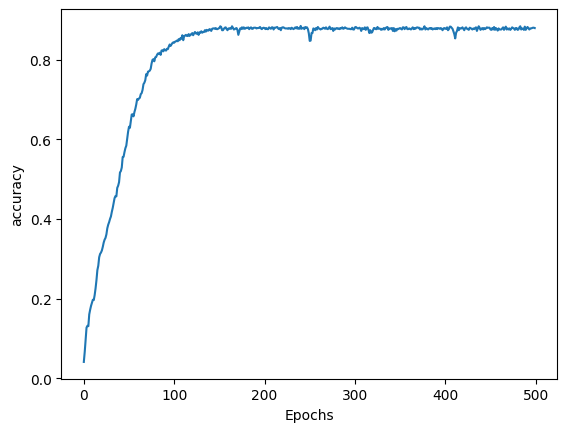

In [26]:
plot_metric(history, 'accuracy')

## Generate new text

In [43]:
tokenizer.texts_to_sequences([seed_text])[0]

[5, 21]

In [93]:
seed_text = 'India is vast'

next_words = 100

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_seq_len-1, padding='pre')
    predicted = model.predict(token_list, verbose=0)
    predicted = np.argmax(predicted)
    #np.argmax(predicted))
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)
    

India is vast which originated in india is practiced worldwide and diversity space nuclear practiced by wind ambedkar ambedkar monsoon been ambedkar ambedkar contemporary ambedkar ambedkar ambedkar several ambedkar ambedkar over ambedkar ambedkar watched ambedkar ambedkar renewable films in films produced produced in genres r ambedkar ambedkar ambedkar the mahal major of films dr ambedkar dr over ambedkar ambedkar ambedkar ambedkar over ambedkar ambedkar with ambedkar cricket in films produced by films produced produced in b mahal orbiter bengal power range tropical largest by by mars bengal r ambedkar ambedkar ambedkar new cricket steadily cricket independence dr b r ambedkar dr ambedkar dr
